In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# Load data
T2Hfile = pd.ExcelFile('https://inventory.data.gov/dataset/58fa1cd3-c1bf-4492-964d-f994b26a6cae/resource/f6d8dd83-3080-470f-b453-03f8ead0228f/download/time-to-hire-data-file.xlsx')

In [3]:
# Create dataframe
df = pd.DataFrame(T2Hfile.parse('TimetoHire1-15-2010 (1)'))

In [4]:
df

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B
5,*(TFM) Federal Sys Integ & Mgmt Ctr (ABOLISHED),CO,040057819MP,1,1,2004-10-12,2004-10-12,2004-10-13,2004-10-26,2004-11-03 00:00:00,2004-11-03,2004-11-03,"Alexandria, VA",2004-11-28,1102A
6,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A
7,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A
8,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y
9,(7P) Office of the Assist. Regional Administra...,7,471821,57,1,2004-09-15,2004-09-16,2004-09-16,2004-10-04,2004-10-18 00:00:00,2004-11-02,2004-11-04,"Fort Worth, TX",2004-11-29,1102F


In [7]:
# First four of the job series, convert to integer and then to string
def clean(x):
    j = []
    if len(x) == 3: 
        for i in x:
                j.append(i)
        j.insert(0,'0')           
 
    else:                             
        for i in x:
            if not i.isalpha():
                j.append(i)
            else:
                break
                
    return(''.join(j))

df['SERIES'] = df['SERIES'].astype('str')
df['CLEAN_SERIES'] = df['SERIES'].apply(lambda x :clean(x))
df['CLEAN_SERIES'] = df['CLEAN_SERIES'].fillna(0)
df['CLEAN_SERIES'].unique()

array(['0301', '0343', '1102', '0808', '2210', '2030', '2003', '2150',
       '1176', '2010', '0303', '0201', '1170', '1101', '0391', '1670',
       '1104', '0203', '0501', '0510', '0800', '0560', '0809', '0801',
       '0318', '1008', '0360', '1105', '0340', '0856', '1106', '2005',
       '0561', '0000', '1171', '1035', '0080', '0802', '1001', '1320',
       '2001', '0804', '0437', '0018', '5306', '2102', '1601', '0028',
       '0950', '1071', '0344', '0830', '1811', '0341', '0544', '0503',
       '0850', '0511', '0361', '0810', '2130', '1910', '1130', '0690',
       '0525', '2101', '1082', '1107', '0260', '0505', '0828', '0326',
       '0305', '1640', '0342', '2032', '0086', '1301', '1515'], dtype=object)

In [8]:
# Calculate time to hire dimension
df['T2H_days'] = pd.Series(delta.days for delta in (df['HIRED_DATE'] - df['RECEIVED_DATE']))

# Create year hired
df['HIRED_DATE_CY'] = df['HIRED_DATE'].dt.year.apply(str)

# subset T2H with positive values
# df = df[(df.T2H_days >= 0) & (df.HIRE_COUNT > 0)] 
df = df[(df['T2H_days'] >= 0) & (df['HIRE_COUNT'] > 0)] 
df.describe()
pd.crosstab(df.HIRED_DATE_CY, df.HIRE_COUNT, margins=True) 

### crosstab - https://chrisalbon.com/python/pandas_crosstabs.html

# subset for 1101s, 1102s
df11xxANOVA = df[(df.CLEAN_SERIES == "1101") | (df.CLEAN_SERIES == "1102")]
pd.crosstab(df11xxANOVA.CLEAN_SERIES, df11xxANOVA.HIRE_COUNT, margins=True)

df1102 = df[df.CLEAN_SERIES == "1102"]
pd.crosstab(df1102.HIRED_DATE_CY, df1102.HIRE_COUNT, margins=True)

HIRE_COUNT,1,2,3,4,5,All
HIRED_DATE_CY,,,,,,
2004,10,2,0,0,0,12
2005,138,90,68,56,270,622
2006,29,27,8,44,0,108
2007,44,24,14,0,8,90
2008,36,19,12,2,0,69
2009,50,42,6,3,5,106
2010,1,0,0,0,0,1
All,308,204,108,105,283,1008


In [10]:
def get_financial_year(datestring):
            date = datetime.datetime.strptime(datestring, "%Y-%m-%d").date()
            #initialize the current year
            year_of_date=date.year
            #initialize the current financial year start date
            financial_year_start_date = datetime.datetime.strptime(str(year_of_date)+"-10-01","%Y-%m-%d").date()
            if date<financial_year_start_date:
                    return (financial_year_start_date.year-1)
            else:
                    return (financial_year_start_date.year)

In [11]:
#There were some missing indexes, which was throwing my code out of whack. I had to reset index here
df = df.reset_index(drop=True)

In [12]:
#Creates FiscalYear column
df.assign(FiscalYear = np.nan)

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,CLEAN_SERIES,T2H_days,HIRED_DATE_CY,FiscalYear
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,0301,88,2004,NaN
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,0343,58,2004,NaN
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,0343,58,2004,NaN
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,0343,58,2004,NaN
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,0343,58,2004,NaN
5,*(TFM) Federal Sys Integ & Mgmt Ctr (ABOLISHED),CO,040057819MP,1,1,2004-10-12,2004-10-12,2004-10-13,2004-10-26,2004-11-03 00:00:00,2004-11-03,2004-11-03,"Alexandria, VA",2004-11-28,1102A,1102,47,2004,NaN
6,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A,0808,73,2004,NaN
7,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A,0808,73,2004,NaN
8,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y,0301,83,2004,NaN
9,(7P) Office of the Assist. Regional Administra...,7,471821,57,1,2004-09-15,2004-09-16,2004-09-16,2004-10-04,2004-10-18 00:00:00,2004-11-02,2004-11-04,"Fort Worth, TX",2004-11-29,1102F,1102,75,2004,NaN


In [ ]:
#Fills in FiscalYear column
count = 0
while count < df['HIRED_DATE_CY'].count():
    FY = get_financial_year(df['HIRED_DATE'][count].strftime('%Y-%m-%d'))
    df.loc[count, 'FiscalYear'] = str(FY)
    count= count +1

In [11]:
#Creates Hired_Date_FY column
df['HIRED_DATE_FY'] = df['FiscalYear'] + '-' + df['HIRED_DATE'].dt.month.apply(str) + '-' + df['HIRED_DATE'].dt.day.apply(str)

In [19]:
df['HIRED_DATE_FY'] = df['HIRED_DATE_FY'].str[:4]
df['HIRED_DATE_FY']

0       2004
1       2004
2       2004
3       2004
4       2004
5       2004
6       2004
7       2004
8       2004
9       2004
10      2004
11      2004
12      2004
13      2004
14      2004
15      2004
16      2004
17      2004
18      2004
19      2004
20      2004
21      2004
22      2004
23      2004
24      2004
25      2004
26      2004
27      2004
28      2004
29      2004
        ... 
6178    2009
6179    2009
6180    2009
6181    2009
6182    2009
6183    2009
6184    2009
6185    2009
6186    2009
6187    2009
6188    2009
6189    2009
6190    2009
6191    2009
6192    2009
6193    2009
6194    2009
6195    2009
6196    2009
6197    2009
6198    2009
6199    2009
6200    2009
6201    2009
6202    2009
6203    2009
6204    2009
6205    2009
6206    2009
6207    2009
Name: HIRED_DATE_FY, Length: 6208, dtype: object

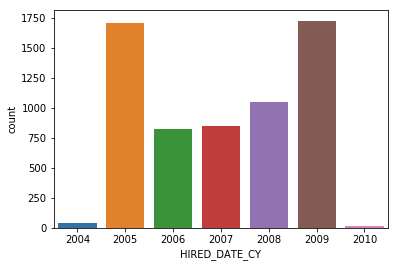

In [18]:
#Comparison - column graph
import seaborn as sns
sns.countplot(x = 'HIRED_DATE_CY', data = df)

# seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
    # orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

# https://seaborn.pydata.org/generated/seaborn.countplot.html

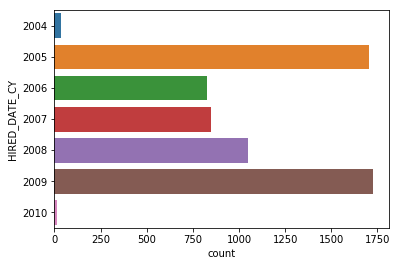

In [21]:
sns.countplot(y = 'HIRED_DATE_CY' , data = df)

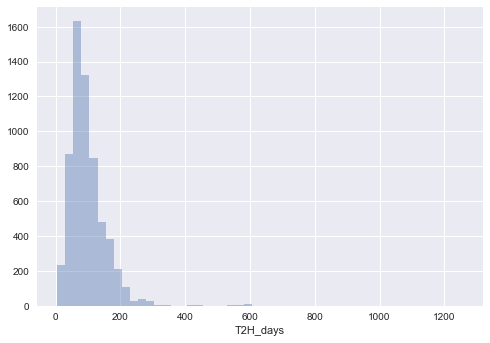

In [9]:
#histogram-T2H Overall using pandas
sns.distplot(df['T2H_days'],kde=False)

# seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, 
    # kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, 
    # axlabel=None, label=None, ax=None)
    
# https://seaborn.pydata.org/generated/seaborn.distplot.html

nan

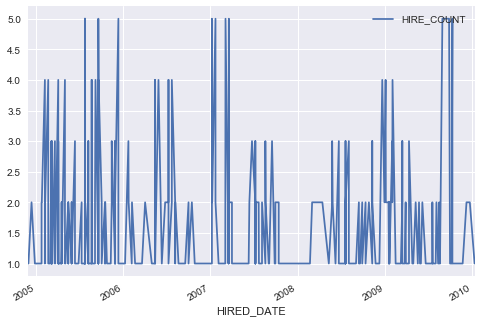

In [10]:
df1102.plot.line(x = 'HIRED_DATE', y = 'HIRE_COUNT')

# matplotlib.pyplot.acorr(x, hold=None, data=None, **kwargs)¶

# https://matplotlib.org/users/pyplot_tutorial.html
# https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot

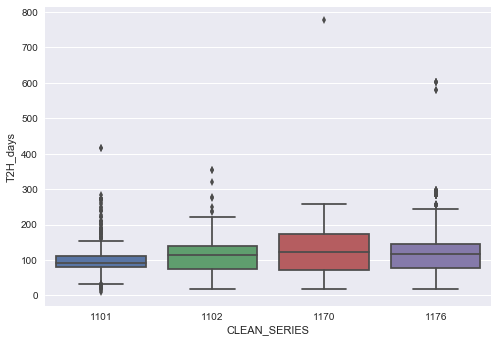

In [11]:
#box & whisker for four 1100 series jobs
#dfBox = df[(df.series_clean == "1101") | (df.series_clean == "1102") | 
    # (df.series_clean == "1170")|(df.series_clean == "1176") ]
    
sns.boxplot(x = 'CLEAN_SERIES', y = 'T2H_days',data = df[(df.CLEAN_SERIES == "1101") | (df.CLEAN_SERIES == "1102") |(df.CLEAN_SERIES == "1170")|(df.CLEAN_SERIES == "1176") ])

# Axes.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, 
    # bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, 
    # showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, 
    # capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, *, data=None)
    
# https://matplotlib.org/examples/pylab_examples/boxplot_demo.html
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html

C:\Program-Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


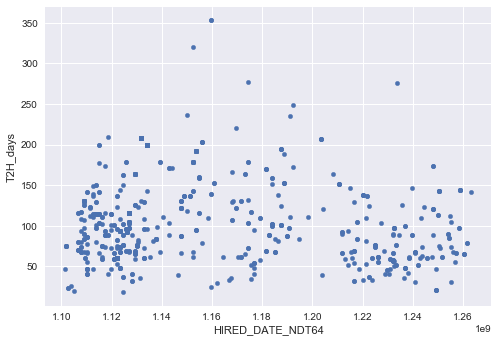

In [12]:
# Python is not very good at handling date datatypes. 
# This converts the dates into unix time code which is the number of seconds since Jan 1st 1970.  

from datetime import datetime
import calendar 
newarr=[]

for dt64 in df1102['HIRED_DATE']:
    imadt = dt64.to_pydatetime()
    newarr.append(calendar.timegm(imadt.timetuple()))
df1102['HIRED_DATE_NDT64'] = newarr
df1102.plot.scatter(x='HIRED_DATE_NDT64',y='T2H_days' )

